# BitCoin Price Prediction (Data Science)
- ## By Vidula Arolkar

## Micro Task 1: Introduction to Numpy, Pandas and requests module.

In [1]:
# pip3 install pandas 

## Micro Task 2 : Data Collection

In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv(r"bitcoin_dataset.csv")
data.head()

,Date,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
0,2/17/2010,0.0,2043200.0,0.0,0.0,0.0,0.000235,0,1.0,0.0,...,31.781022,0.0,241,244,41240,244,244,65173.13,36500.0,0.0
1,2/18/2010,0.0,2054650.0,0.0,0.0,0.0,0.000241,0,1.0,0.0,...,154.463801,0.0,234,235,41475,235,235,18911.74,7413.0,0.0
2,2/19/2010,0.0,2063600.0,0.0,0.0,0.0,0.000228,0,1.0,0.0,...,1278.516635,0.0,185,183,41658,183,183,9749.98,700.0,0.0
3,2/20/2010,0.0,2074700.0,0.0,0.0,0.0,0.000218,0,1.0,0.0,...,22186.687990,0.0,224,224,41882,224,224,11150.03,50.0,0.0
4,2/21/2010,0.0,2085400.0,0.0,0.0,0.0,0.000234,0,1.0,0.0,...,689.179876,0.0,218,218,42100,218,218,12266.83,1553.0,0.0


In [4]:
data.shape

(2906, 24)

In [5]:
data['btc_market_price'].iloc[1023]

13.6888

## Micro Task 3: Exploratory Data Analysis

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

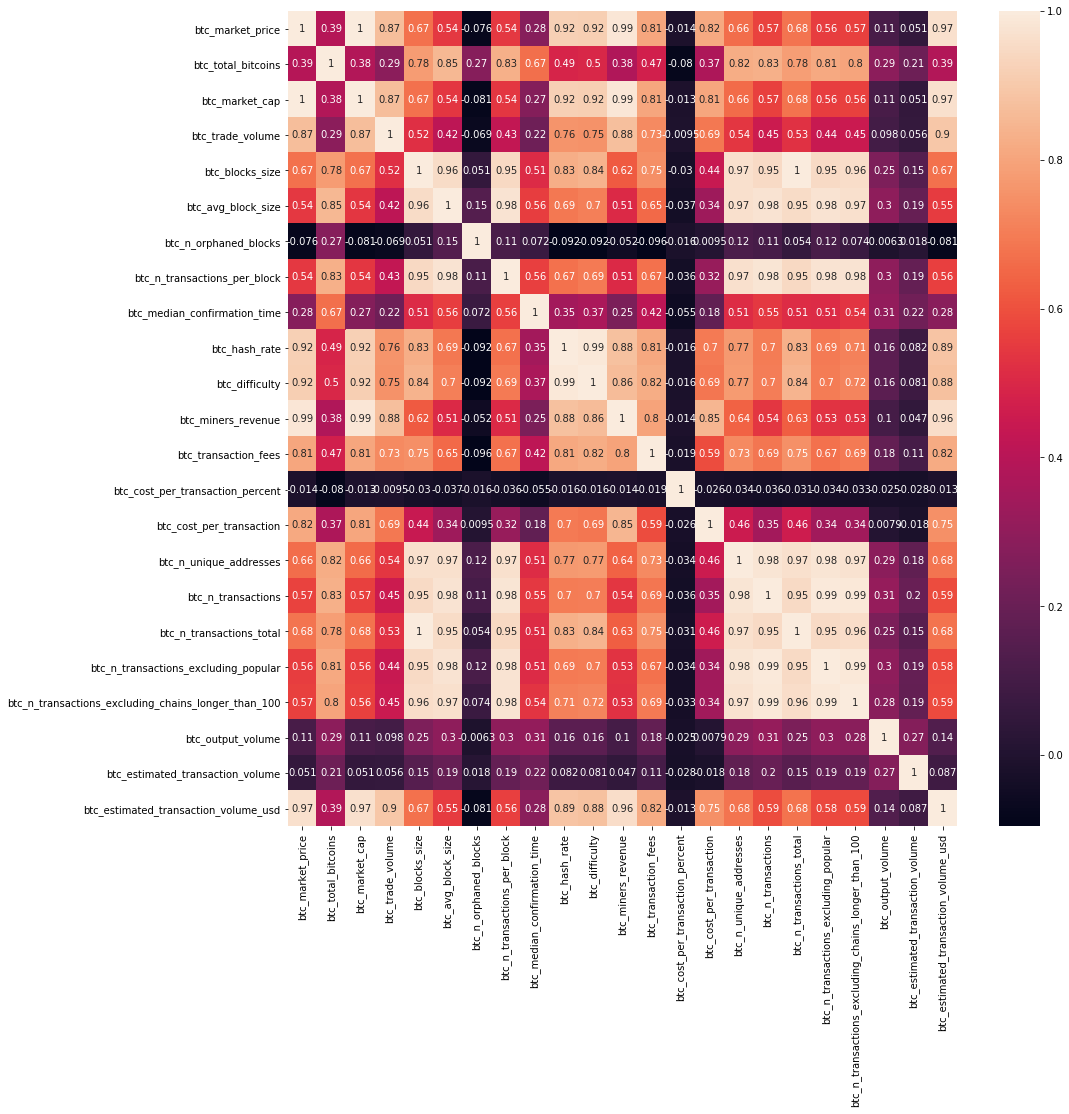

In [7]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(), annot = True)

### btc_market_cap has perfect correlation with btc_market_price.

## Micro Task 4: Data Cleaning

In [8]:
new_data = data[['btc_market_cap','btc_n_transactions','btc_miners_revenue','btc_cost_per_transaction','btc_difficulty','btc_hash_rate','btc_cost_per_transaction_percent','btc_market_price']]

In [9]:
new_data.head()

,btc_market_cap,btc_n_transactions,btc_miners_revenue,btc_cost_per_transaction,btc_difficulty,btc_hash_rate,btc_cost_per_transaction_percent,btc_market_price
0,0.0,244,0.0,0.0,2.527738,0.000029,31.781022,0.0
1,0.0,235,0.0,0.0,2.527738,0.000029,154.463801,0.0
2,0.0,183,0.0,0.0,2.527738,0.000023,1278.516635,0.0
3,0.0,224,0.0,0.0,2.527738,0.000028,22186.687990,0.0
4,0.0,218,0.0,0.0,2.527738,0.000027,689.179876,0.0


In [10]:
new_data.isnull().sum()

btc_market_cap                       0
btc_n_transactions                   0
btc_miners_revenue                   0
btc_cost_per_transaction             0
btc_difficulty                      16
btc_hash_rate                        0
btc_cost_per_transaction_percent     0
btc_market_price                     0
dtype: int64

### Replacing the NaN values with Mean.

In [11]:
new_data = new_data.fillna(new_data.mean())

In [12]:
new_data.isnull().sum()

btc_market_cap                      0
btc_n_transactions                  0
btc_miners_revenue                  0
btc_cost_per_transaction            0
btc_difficulty                      0
btc_hash_rate                       0
btc_cost_per_transaction_percent    0
btc_market_price                    0
dtype: int64

## Micro Task 5: Model Formulation and Predicitions

### Split the data into train and test:

In [13]:
X= new_data.drop('btc_market_price', axis =1)
y = new_data['btc_market_price']

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state =0)


In [16]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2034, 7)
(872, 7)
(2034,)
(872,)


### Linear Regression:

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [19]:
predictions = lr.predict(X_test)

### Scatterplot to check linear relationship:

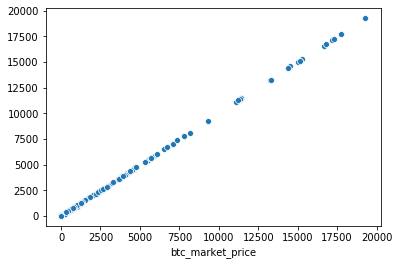

In [20]:
sns.scatterplot(y_test, predictions)

### Mean Squared Error:

In [21]:
from sklearn.metrics import mean_squared_error

In [22]:
print("Mean Squared error:",mean_squared_error(y_test, predictions))

Mean Squared error: 436.32754893885397
